In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import os
import pickle
import matplotlib.collections as clt
import ptitprince as pt

In C:\Users\francescag\AppData\Local\Continuum\miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\francescag\AppData\Local\Continuum\miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\francescag\AppData\Local\Continuum\miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
def load_exp_var_data_for_site(site, mice):
    file_name = site + '_explained_variances.p'
    processed_data_dir = os.path.join('W:\\photometry_2AC\\processed_data\\linear_regression_data\\')
    saving_filename = os.path.join('W:\\photometry_2AC\\processed_data\\linear_regression_data\\', file_name)

    reg_stats = pickle.load(open(saving_filename, 'rb'))
    reg_stats = reg_stats[reg_stats['mouse_id'].isin(mice)]
    mean_stats = reg_stats.groupby(['mouse_id'])[ ['cue explained variance', 'choice explained variance', 'outcome explained variance', 'full model explained variance']].apply(np.mean)
    types = []
    variances = []
    for ind, row in mean_stats.iterrows():
        types.append('cue')
        types.append('choice')
        types.append('outcome')
        types.append('full')
        variances.append(row['cue explained variance'])
        variances.append(row['choice explained variance'])
        variances.append(row['outcome explained variance'])
        variances.append(row['full model explained variance'])
    stats_dict = {'predictor': types, 'explained variance': variances}
    reshaped_stats = pd.DataFrame(stats_dict)
    if site == 'Nacc':
        label = 'VS'
    elif site == 'tail':
        label = 'AudS'
    reshaped_stats['site'] = label
    return reshaped_stats

In [3]:
def get_data_both_sites_for_predictor(nacc_data, tail_data, predictor):
    df =  pd.concat([nacc_data[nacc_data['predictor']==predictor], tail_data[tail_data['predictor']==predictor]])
    return df

In [4]:
nacc_data = load_exp_var_data_for_site('Nacc', ['SNL_photo28', 'SNL_photo30', 'SNL_photo31', 'SNL_photo32', 'SNL_photo33', 'SNL_photo34', 'SNL_photo35'])
tail_data = load_exp_var_data_for_site('tail', ['SNL_photo16', 'SNL_photo17', 'SNL_photo18', 'SNL_photo21', 'SNL_photo22', 'SNL_photo26'])

In [12]:
file_name = 'tail' + '_explained_variances.p'
processed_data_dir = os.path.join('W:\\photometry_2AC\\processed_data\\linear_regression_data\\')
saving_filename = os.path.join('W:\\photometry_2AC\\processed_data\\linear_regression_data\\', file_name)

pickle.load(open(saving_filename, 'rb'))

,mouse_id,date,cue explained variance,choice explained variance,outcome explained variance,full model explained variance
0,SNL_photo16,20200210,1.067119,70.803366,18.250893,8.099442
1,SNL_photo16,20200213,11.202116,77.202413,22.408877,4.380495
2,SNL_photo16,20200218,10.255748,57.784334,19.321626,7.557852
3,SNL_photo17,20200204,11.054159,68.180984,20.884747,4.456025
4,SNL_photo17,20200206,2.145460,97.244914,10.424451,9.772590
5,SNL_photo17,20200208,5.330439,78.494655,25.062946,10.307618
6,SNL_photo18,20200223,18.167955,44.790707,22.504961,5.816843
7,SNL_photo18,20200226,3.181345,65.597458,41.012259,7.252510
8,SNL_photo18,20200228,4.835830,64.807955,44.513499,7.899679
9,SNL_photo21,20200806,18.618418,19.018594,39.234975,6.019226


In [121]:
full_df =  get_data_both_sites_for_predictor(nacc_data, tail_data, 'full')
cue_df = get_data_both_sites_for_predictor(nacc_data, tail_data, 'cue')
choice_df = get_data_both_sites_for_predictor(nacc_data, tail_data, 'choice')
outcome_df = get_data_both_sites_for_predictor(nacc_data, tail_data, 'outcome')

In [197]:

def make_box_plot(df, fig_ax,  dx ='site', dy = 'explained variance', ort = "v", pal = "Set2", set_ylims=False):
    sns.stripplot( x = dx, y = dy, data = df, palette = pal, edgecolor = "white",
                     size = 5, jitter = 1, zorder = 0, orient = ort, ax=fig_ax)
    sns.boxplot( x = dx, y = dy, data = df, color = "black", width = .5, zorder = 10,linewidth=0.5, \
                showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
                showfliers=False, whiskerprops = {'linewidth':0.5, "zorder":10},\
                   saturation = 1, orient = ort, ax=fig_ax)
    fig_ax.set_xlim([-0.5, 1.5])
    if set_ylims:  
        fig_ax.set_ylim([-2, np.max(df[dy]) + 2])

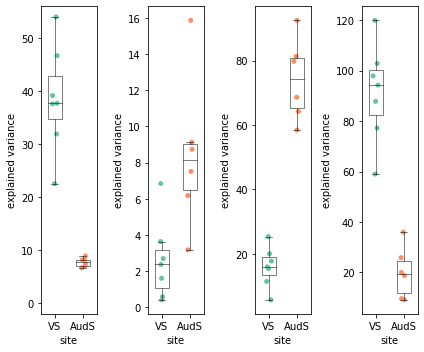

In [198]:
import matplotlib.pyplot as plt
f, axs = plt.subplots(nrows=1, ncols=4, figsize=(6, 5))
make_box_plot(full_df, axs[0], set_ylims=True)
make_box_plot(cue_df, axs[1])
make_box_plot(choice_df, axs[2])
make_box_plot(outcome_df, axs[3])
plt.tight_layout()

(-2.0, 121.94269924535462)

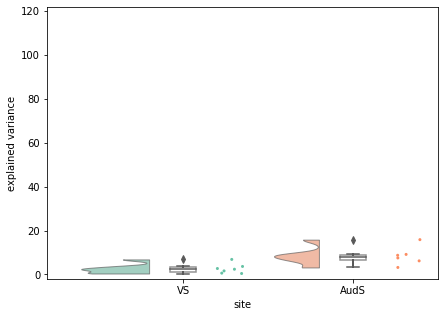

In [146]:
dx ='site'; dy = 'explained variance'; data = cue_df; ort = "v"; pal = "Set2"; sigma = .3
f, ax = plt.subplots(figsize=(7, 5))

pt.RainCloud(x = dx, y = dy, data = data, palette = pal, bw = sigma, width_viol = 0.8,
                ax = ax, orient = ort , alpha = .65, dodge = True, move = .3)
ax.set_xlim([-0.8, 1.5])
ax.set_ylim([-2, np.max(pd.concat([nacc_data, tail_data])[dy]) + 2])

(-2.0, 121.94269924535462)

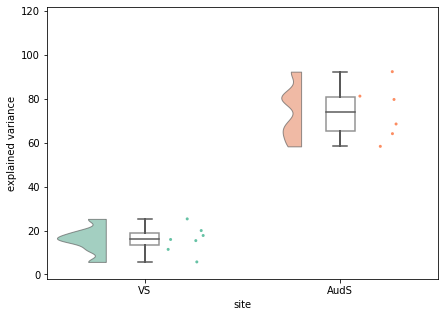

In [154]:
dx ='site'; dy = 'explained variance'; data = choice_df; ort = "v"; pal = "Set2"; sigma = .3
f, ax = plt.subplots(figsize=(7, 5))

pt.RainCloud(x = dx, y = dy, data = data, palette = pal, bw = sigma, width_viol = 0.5,
                ax = ax, orient = ort , alpha = .65, dodge = True, move = .2)
ax.set_xlim([-0.5, 1.5])
ax.set_ylim([-2, np.max(pd.concat([nacc_data, tail_data])[dy]) + 2])

(-2.0, 121.94269924535462)

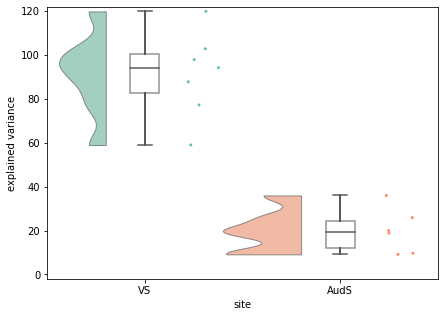

In [140]:
dx ='site'; dy = 'explained variance'; data = outcome_df; ort = "v"; pal = "Set2"; sigma = .3
f, ax = plt.subplots(figsize=(7, 5))

pt.RainCloud(x = dx, y = dy, data = data, palette = pal, bw = sigma, width_viol = 0.8,
                ax = ax, orient = ort , alpha = .65, dodge = True, move = .3)
ax.set_xlim([-0.5, 1.5])
ax.set_ylim([-2, np.max(pd.concat([nacc_data, tail_data])[dy]) + 2])

(-1.0, 4.0)

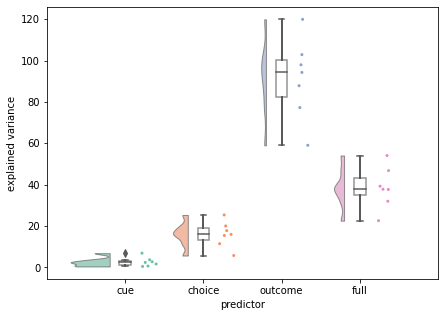

In [103]:
dx ='predictor'; dy = 'explained variance'; ort = "v"; pal = "Set2"; sigma = .3
f, ax = plt.subplots(figsize=(7, 5))

pt.RainCloud(x = dx, y = dy, data = nacc_data, palette = pal, bw = sigma, width_viol = 1,
                ax = ax, orient = ort , alpha = .65, dodge = True, move = .3)
ax.set_xlim([-1, 4])